In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import sklearn
import scipy
import seaborn as sb
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data=pd.read_csv("Dataset.csv")


In [3]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
import missingno as msno


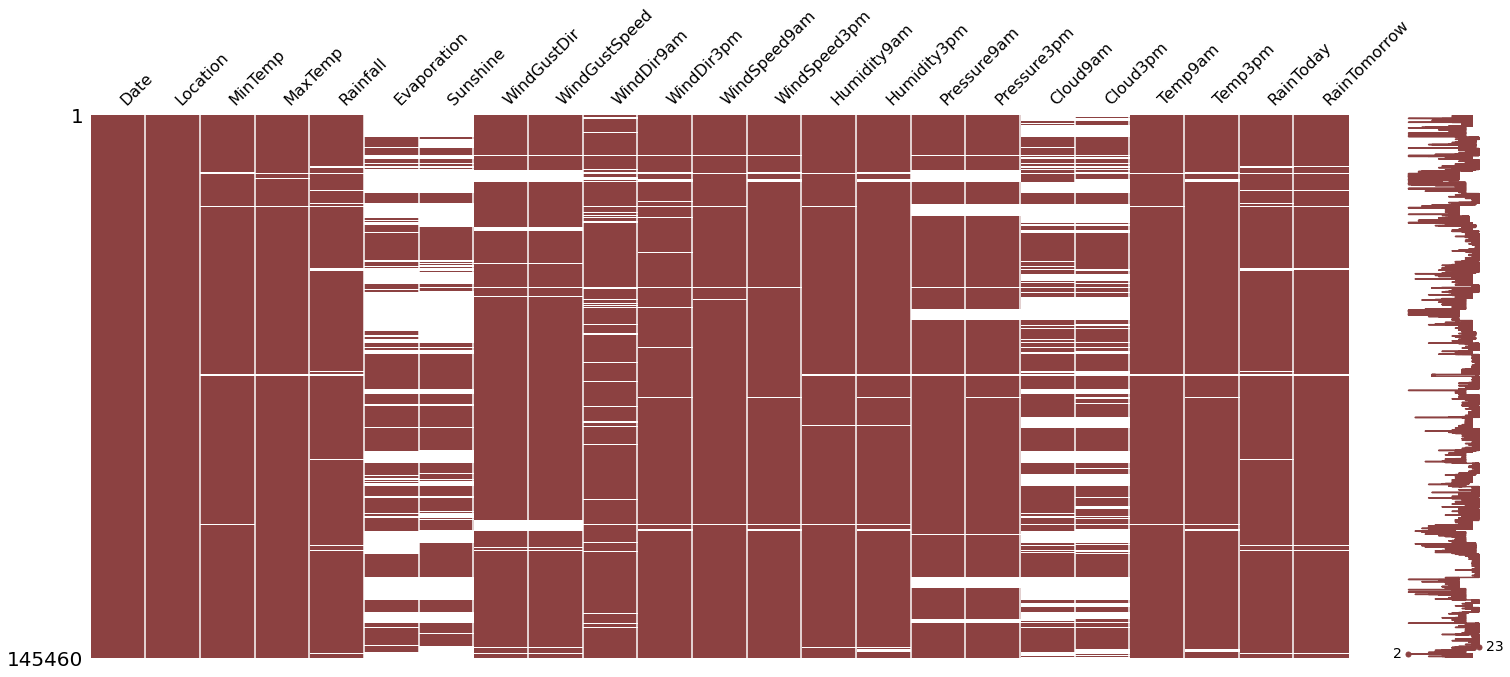

In [7]:
msno.matrix(data,color=(0.55,0.255,0.255),fontsize=16)


In [8]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]

In [9]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [10]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)


In [11]:
c_names=data_c.columns


In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [14]:
data_c=imp_mode.fit_transform(data_c)


In [15]:
data_c=pd.DataFrame(data_c,columns=c_names)

In [16]:
data_c.tail()


,RainToday,WindGustDir,WindDir9am,WindDir3pm
145455,No,E,SE,ENE
145456,No,NNW,SE,N
145457,No,N,SE,WNW
145458,No,SE,SSE,N
145459,No,W,ESE,ESE


In [17]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Delhi,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,Delhi,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,Delhi,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,Delhi,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,Delhi,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [18]:
data=pd.concat([data,data_c],axis=1)

In [19]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Delhi,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,W,W,WNW
1,2008-12-02,Delhi,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,WNW,NNW,WSW
2,2008-12-03,Delhi,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,WSW,W,WSW
3,2008-12-04,Delhi,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,NE,SE,E
4,2008-12-05,Delhi,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,W,ENE,NW


In [20]:
corr=data.corr()

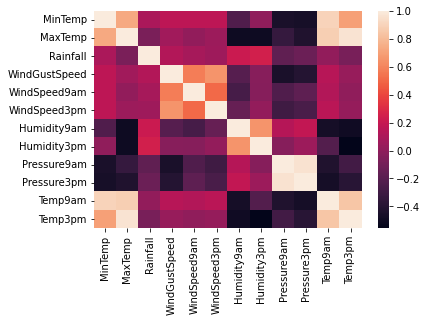

In [21]:
sb.heatmap(data=corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

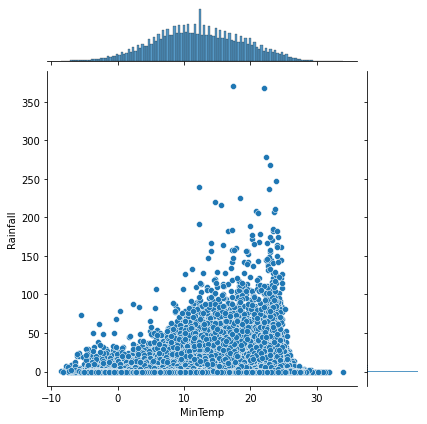

In [22]:
sb.jointplot(data["MinTemp"],data['Rainfall'])


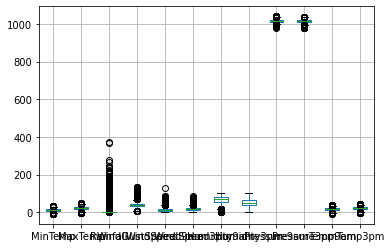

In [23]:
data.boxplot()

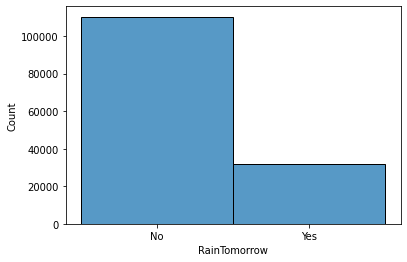

In [24]:

sb.histplot(data['RainTomorrow'])

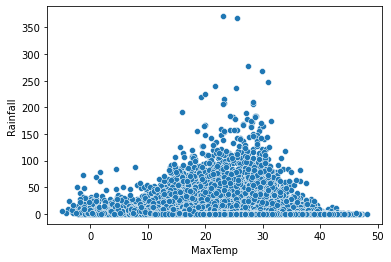

In [25]:
sb.scatterplot(data['MaxTemp'],data['Rainfall'])

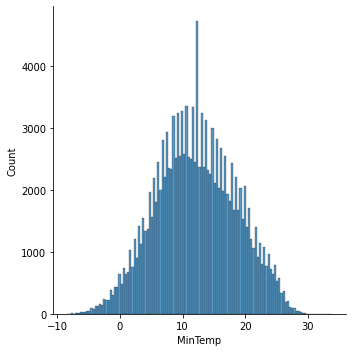

In [26]:
sb.displot(data['MinTemp'])


**Splitting the data**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
data = data[data['RainTomorrow'].notnull()]


In [29]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)


In [30]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [31]:
set(y)

{'No', 'Yes'}

In [32]:
x=x.drop('Date',axis=1)

In [33]:
names=x.columns

In [34]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [35]:
sc=StandardScaler()

In [36]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [37]:
print(len(x),len(y))


142193 142193


In [38]:
LE = LabelEncoder()
x['Location'] = LE.fit_transform(x['Location'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,14,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,14,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,14,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,14,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,14,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [39]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)

In [40]:
print(len(x),len(y))


142193 142193


In [41]:
sc=StandardScaler()

In [42]:
x=sc.fit_transform(x)


In [43]:
x[:5]

array([[-0.71500814,  0.1899491 , -0.04596252, -0.2077696 ,  0.30539521,
         0.67761657,  0.61479645,  0.11386682, -1.43600466, -1.47545613,
        -1.22096552, -0.01352387,  0.01642307, -0.53296232,  1.05255576,
         1.32893289,  1.36627749],
       [-0.71500814, -0.74917952,  0.26348131, -0.27900154,  0.30539521,
        -1.13007826,  0.38547865, -1.31228915, -1.28989124, -1.04558606,
        -1.11620276,  0.03282863,  0.38028454, -0.53296232,  1.26558231,
        -0.2215706 ,  1.58623629],
       [-0.71500814,  0.11168839,  0.34787508, -0.27900154,  0.45762138,
         0.56463565,  0.84411424, -1.6292127 , -1.04636888, -1.49027923,
        -0.98150779,  0.61996026,  0.22018549, -0.53296232,  1.47860885,
         1.32893289,  1.58623629],
       [-0.71500814, -0.46744093,  0.67138453, -0.27900154, -1.21686656,
        -0.33921177, -1.10508701, -1.25946856, -1.7282315 , -0.00796867,
        -0.36789739,  0.17188612,  0.70048263, -0.53296232, -0.86468316,
         0.4429309 

In [44]:
x=pd.DataFrame(x,columns=names)

In [45]:
from sklearn import model_selection

In [46]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)


**Training and Testing the model**

In [47]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
RFC=RandomForestClassifier()

In [50]:
GBC=GradientBoostingClassifier()


In [51]:
np.any(np.isnan(x))

False

In [52]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [53]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
data.isnull().any()


Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainTomorrow     False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [55]:
x.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [56]:
p1=RFC.predict(x_train)

In [57]:
p2=RFC.predict(x_test)